# Verify AlphaFold accuracy for 300 targets
Subset: target_subset_how_eq_random_num_300_seed_0

Set the target numbers of `is_similar_AF2` and not `is_similar_AF2` equal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (5, 3)
from scipy import stats

In [2]:
data_dir = Path('../../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().parent.name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'accuracy'
fig_dir.mkdir(parents=True, exist_ok=True)
target_list = data_dir / 'interim' / f'{subset_name}.csv'
assert target_list.exists()

In [3]:
label_path = score_dir / 'label.csv'
label_df = pd.read_csv(label_path, index_col=0)
label_df

Model  TMscore  GDT_TS  GDT_HA  Global_LDDT  \
0       model_1_ptm_seed_0_rec_10_ens_1    0.981   0.980   0.919        0.910   
1       model_1_ptm_seed_0_rec_10_ens_8    0.981   0.979   0.916        0.910   
2        model_1_ptm_seed_0_rec_1_ens_1    0.981   0.980   0.917        0.909   
3        model_1_ptm_seed_0_rec_1_ens_8    0.980   0.979   0.917        0.910   
4        model_1_ptm_seed_0_rec_2_ens_1    0.981   0.979   0.919        0.911   
...                                 ...      ...     ...     ...          ...   
108595       model_5_seed_1_rec_7_ens_8    0.960   0.981   0.887        0.909   
108596       model_5_seed_1_rec_8_ens_1    0.960   0.981   0.887        0.910   
108597       model_5_seed_1_rec_8_ens_8    0.960   0.981   0.884        0.909   
108598       model_5_seed_1_rec_9_ens_1    0.959   0.981   0.887        0.908   
108599       model_5_seed_1_rec_9_ens_8    0.961   0.981   0.884        0.909   

        Mean_LDDT  pLDDT  pTMscore  Tolerance    ModelName  Seed  Recycle  \
0           0.901  0.955     0.900      0.032  model_1_ptm     0       10   
1           0.901  0.956     0.901      0.019  model_1_ptm     0       10   
2           0.901  0.944     0.895     20.749  model_1_ptm     0        1   
3           0.901  0.947     0.896     20.749  model_1_ptm     0        1   
4           0.903  0.948     0.897      0.172  model_1_ptm     0        2   
...           ...    ...       ...        ...          ...   ...      ...   
108595      0.907  0.875       NaN      0.627      model_5     1        7   
108596      0.907  0.876       NaN      0.339      model_5     1        8   
108597      0.907  0.875       NaN      0.426      model_5     1        8   
108598      0.906  0.876       NaN      0.492      model_5     1        9   
108599      0.906  0.875       NaN      0.148      model_5     1        9   

        Ensemble  Target  Num_diff  Num_missing  Length  
0              1  6AN4_A         0            7     158  
1              8  6AN4_A         0            7     158  
2              1  6AN4_A         0            7     158  
3              8  6AN4_A         0            7     158  
4              1  6AN4_A         0            7     158  
...          ...     ...       ...          ...     ...  
108595         8  6Y24_A         0           13      93  
108596         1  6Y24_A         0           13      93  
108597         8  6Y24_A         0           13      93  
108598         1  6Y24_A         0           13      93  
108599         8  6Y24_A         0           13      93  

[108600 rows x 17 columns]

In [4]:
target_df = pd.read_csv(target_list, index_col=0)
neff_csv = score_dir / 'neff.csv'
neff_df = pd.read_csv(neff_csv, index_col=0)
target_df = pd.merge(target_df, neff_df, left_on='id', right_on='Target').drop(columns='Target')
target_df

id  resolution           releasedate  \
0    6AN4_A       1.470  2019-04-17T00:00:00Z   
1    5ZHE_A       2.180  2021-03-03T00:00:00Z   
2    6DCR_A       1.980  2019-04-17T00:00:00Z   
3    6D57_A       1.810  2019-04-24T00:00:00Z   
4    5ZCT_A       2.050  2019-03-27T00:00:00Z   
..      ...         ...                   ...   
295  6SRN_A       1.500  2020-03-04T00:00:00Z   
296  7NUU_A       1.840  2020-09-30T00:00:00Z   
297  7P2J_A       1.985  2019-06-12T00:00:00Z   
298  6KZ7_B       2.283  2019-06-19T00:00:00Z   
299  6Y24_A       1.860  2021-04-07T00:00:00Z   

                                                header  \
0    >6an4_A mol:protein length:158  2-amino-4-hydr...   
1    >5zhe_A mol:protein length:253  Ditrans,polyci...   
2    >6dcr_A mol:protein length:694  Primosomal pro...   
3    >6d57_A mol:protein length:161  Ferric uptake ...   
4    >5zct_A mol:protein length:306  Ribosomal prot...   
..                                                 ...   
295  >6srn_A mol:protein length:214  TetR family tr...   
296  >7nuu_A mol:protein length:409  N-acetylglucos...   
297  >7p2j_A mol:protein length:114  Fucose-binding...   
298  >6kz7_B mol:protein length:82  SWI/SNF-related...   
299  >6y24_A mol:protein length:93  Far upstream el...   

                                              sequence  length  \
0    TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...     158   
1    MMLSATQPLSEKLPAHGCRHVAIIMDGNGRWAKKQGKIRAFGHKAG...     253   
2    MGSSHHHHHHSSGLVPRGSHMPVAHVALPVPLPRTFDYLLPEGMTV...     694   
3    GAMGMLIENVEYDVLLERFKKILRQGGLKYTKQREVLLKTLYHSDT...     161   
4    MKIAILSRDGTLYSCKRLREAAIQRGHLVEILDPLSCYMNINPAAS...     306   
..                                                 ...     ...   
295  MTSAQQPTPFAVRSNVPRGPHPQQERSIKTRAQILEAASEIFASRG...     214   
296  MRGEQGAAGARVLQFTNCRILRGGKLLREDLWVRGGRILDPEKLFF...     409   
297  SSEIAALKQEIAALKKEIAALKAGASVQTAATSWGTVPSIRVYTAN...     114   
298  HDPAVIHENASQPEVLVPIRLDMEIDGQKLRDAFTWNMNEKLMTPE...      82   
299  SMQGNWNMGPPGGLQEFNFIVPTGKTGLIIGKGGETIKSISQQSGA...      93   

     num_entry_in_cluster  num_entry_in_cluster_AF2_notInclude  \
0                      90                                    5   
1                      52                                    2   
2                       8                                    4   
3                       4                                    2   
4                      11                                    9   
..                    ...                                  ...   
295                     2                                    2   
296                     4                                    4   
297                    10                                   10   
298                     3                                    3   
299                     1                                    1   

     is_similar_AF2  Neff  NumMSA  
0              True  9570   15080  
1              True  8090   16217  
2              True  7746   14530  
3              True  5634    8249  
4              True  2821    8526  
..              ...   ...     ...  
295           False  4660    8356  
296           False  6239   10911  
297           False   215     456  
298           False   635    4555  
299           False  5309    8358  

[300 rows x 11 columns]

In [5]:
target_df['is_similar_AF2'].value_counts()

False    150
True     150
Name: is_similar_AF2, dtype: int64

In [6]:
df = pd.merge(label_df, target_df, left_on='Target', right_on='id', how='left')
df

Model  TMscore  GDT_TS  GDT_HA  Global_LDDT  \
0       model_1_ptm_seed_0_rec_10_ens_1    0.981   0.980   0.919        0.910   
1       model_1_ptm_seed_0_rec_10_ens_8    0.981   0.979   0.916        0.910   
2        model_1_ptm_seed_0_rec_1_ens_1    0.981   0.980   0.917        0.909   
3        model_1_ptm_seed_0_rec_1_ens_8    0.980   0.979   0.917        0.910   
4        model_1_ptm_seed_0_rec_2_ens_1    0.981   0.979   0.919        0.911   
...                                 ...      ...     ...     ...          ...   
108595       model_5_seed_1_rec_7_ens_8    0.960   0.981   0.887        0.909   
108596       model_5_seed_1_rec_8_ens_1    0.960   0.981   0.887        0.910   
108597       model_5_seed_1_rec_8_ens_8    0.960   0.981   0.884        0.909   
108598       model_5_seed_1_rec_9_ens_1    0.959   0.981   0.887        0.908   
108599       model_5_seed_1_rec_9_ens_8    0.961   0.981   0.884        0.909   

        Mean_LDDT  pLDDT  pTMscore  Tolerance    ModelName  ...  resolution  \
0           0.901  0.955     0.900      0.032  model_1_ptm  ...       1.470   
1           0.901  0.956     0.901      0.019  model_1_ptm  ...       1.470   
2           0.901  0.944     0.895     20.749  model_1_ptm  ...       1.470   
3           0.901  0.947     0.896     20.749  model_1_ptm  ...       1.470   
4           0.903  0.948     0.897      0.172  model_1_ptm  ...       1.470   
...           ...    ...       ...        ...          ...  ...         ...   
108595      0.907  0.875       NaN      0.627      model_5  ...       1.860   
108596      0.907  0.876       NaN      0.339      model_5  ...       1.860   
108597      0.907  0.875       NaN      0.426      model_5  ...       1.860   
108598      0.906  0.876       NaN      0.492      model_5  ...       1.860   
108599      0.906  0.875       NaN      0.148      model_5  ...       1.860   

                 releasedate  \
0       2019-04-17T00:00:00Z   
1       2019-04-17T00:00:00Z   
2       2019-04-17T00:00:00Z   
3       2019-04-17T00:00:00Z   
4       2019-04-17T00:00:00Z   
...                      ...   
108595  2021-04-07T00:00:00Z   
108596  2021-04-07T00:00:00Z   
108597  2021-04-07T00:00:00Z   
108598  2021-04-07T00:00:00Z   
108599  2021-04-07T00:00:00Z   

                                                   header  \
0       >6an4_A mol:protein length:158  2-amino-4-hydr...   
1       >6an4_A mol:protein length:158  2-amino-4-hydr...   
2       >6an4_A mol:protein length:158  2-amino-4-hydr...   
3       >6an4_A mol:protein length:158  2-amino-4-hydr...   
4       >6an4_A mol:protein length:158  2-amino-4-hydr...   
...                                                   ...   
108595  >6y24_A mol:protein length:93  Far upstream el...   
108596  >6y24_A mol:protein length:93  Far upstream el...   
108597  >6y24_A mol:protein length:93  Far upstream el...   
108598  >6y24_A mol:protein length:93  Far upstream el...   
108599  >6y24_A mol:protein length:93  Far upstream el...   

                                                 sequence  length  \
0       TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...     158   
1       TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...     158   
2       TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...     158   
3       TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...     158   
4       TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...     158   
...                                                   ...     ...   
108595  SMQGNWNMGPPGGLQEFNFIVPTGKTGLIIGKGGETIKSISQQSGA...      93   
108596  SMQGNWNMGPPGGLQEFNFIVPTGKTGLIIGKGGETIKSISQQSGA...      93   
108597  SMQGNWNMGPPGGLQEFNFIVPTGKTGLIIGKGGETIKSISQQSGA...      93   
108598  SMQGNWNMGPPGGLQEFNFIVPTGKTGLIIGKGGETIKSISQQSGA...      93   
108599  SMQGNWNMGPPGGLQEFNFIVPTGKTGLIIGKGGETIKSISQQSGA...      93   

        num_entry_in_cluster  num_entry_in_cluster_AF2_notInclude  \
0                         90                                    5   
1                         9

In [7]:
# Check target number
targets = df['Target'].unique().tolist()
print(len(targets))

300


In [8]:
# Check target number that does not have LDDT score
df.groupby('Target').head(1)['Global_LDDT'].isnull().sum()

29

## Model Quality

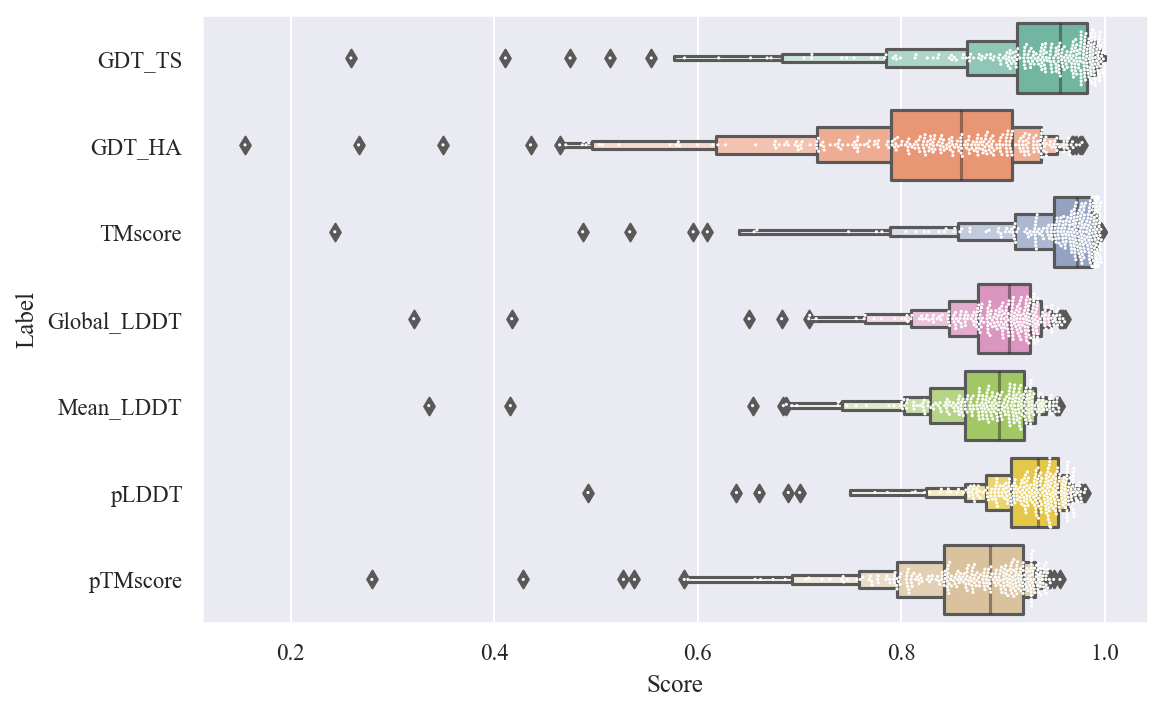

In [9]:
# max value for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Global_LDDT', 'Mean_LDDT', 'pLDDT', 'pTMscore']
for label in labels:
    data=df.groupby('Target').max(label)
    data['Score'] = data[label]
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
# xticks_max = 1.1
# plt.xlim(None, 1.15)
# xticks = np.append(np.arange(0.2, 1.2, 0.2), [xticks_max])
# xticks_str = list(map(lambda x: str(x)[:3], xticks))
# xticks_str[-1] = 'Mean'
# plt.xticks(xticks, xticks_str)
# plt.axvline(x=xticks_max, color=(234/255, 234/255, 242/255))
# mean_series = label_max_df.groupby('Label').mean()['Score']
# for i, label in enumerate(labels):
#     value = mean_series[label]
#     plt.text(xticks_max, i, f'{value:.3f}', size=10, horizontalalignment='center', verticalalignment='center')
plt.tight_layout()
plt.savefig(fig_dir / 'max_value_each_labels.png')


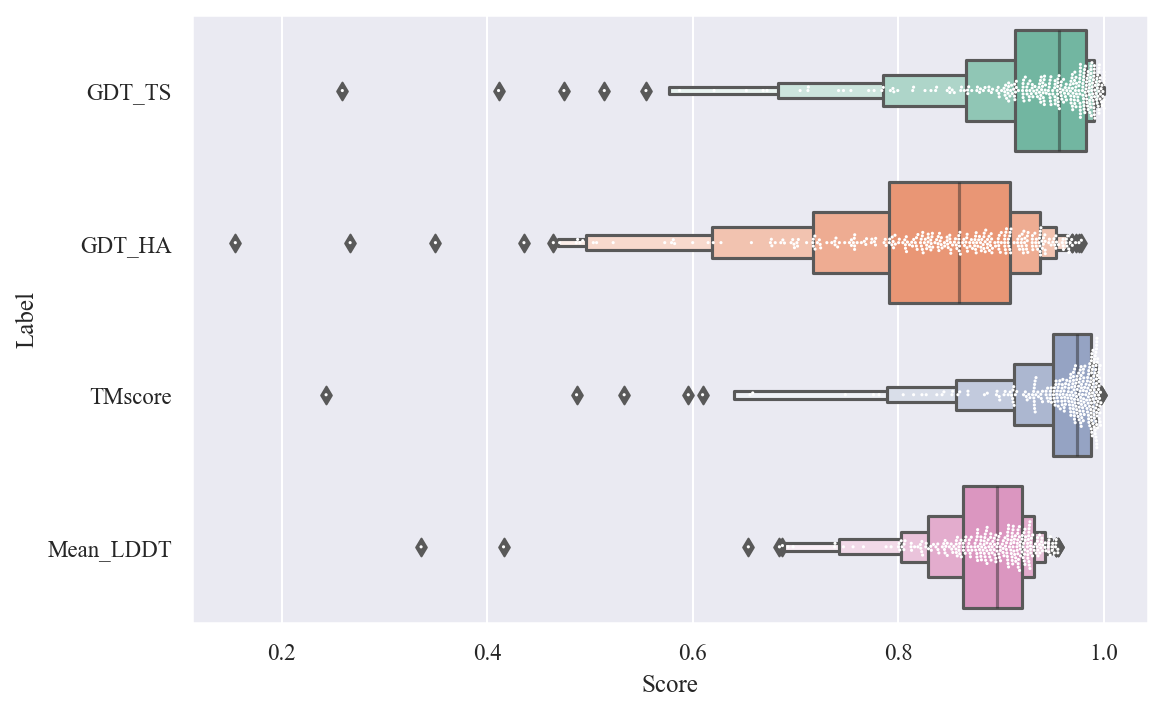

In [10]:
# max value for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
for label in labels:
    data=df.groupby('Target').max(label)
    data['Score'] = data[label]
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
# xticks_max = 1.1
# plt.xlim(None, 1.15)
# xticks = np.append(np.arange(0.2, 1.2, 0.2), [xticks_max])
# xticks_str = list(map(lambda x: str(x)[:3], xticks))
# xticks_str[-1] = 'Mean'
# plt.xticks(xticks, xticks_str)
# plt.axvline(x=xticks_max, color=(234/255, 234/255, 242/255))
# mean_series = label_max_df.groupby('Label').mean()['Score']
# for i, label in enumerate(labels):
#     value = mean_series[label]
#     plt.text(xticks_max, i, f'{value:.3f}', size=10, horizontalalignment='center', verticalalignment='center')
plt.tight_layout()
# plt.savefig(fig_dir / 'max_value_each_labels.png')

### Verify whether the quality of the predicted structure changes between targets that have similar sequences in the AlphaFold training data and targets that do not

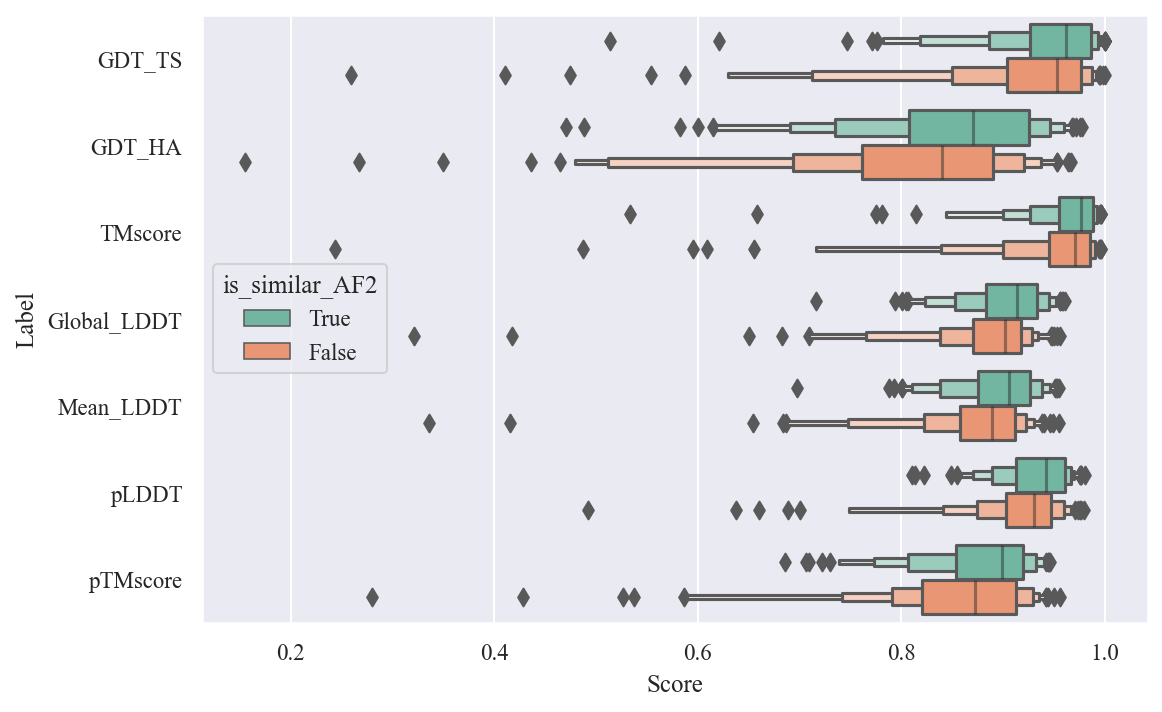

In [11]:
# max value for each label
# Targets whose similar sequence is included in AF2 training dataset or not
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Global_LDDT', 'Mean_LDDT', 'pLDDT', 'pTMscore']
for label in labels:
    data=df.groupby('Target').max(label)
    data['Score'] = data[label]
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2', hue='is_similar_AF2', hue_order=[True, False])
plt.tight_layout()
plt.savefig(fig_dir / 'max_value_each_labels_similar_training.png')

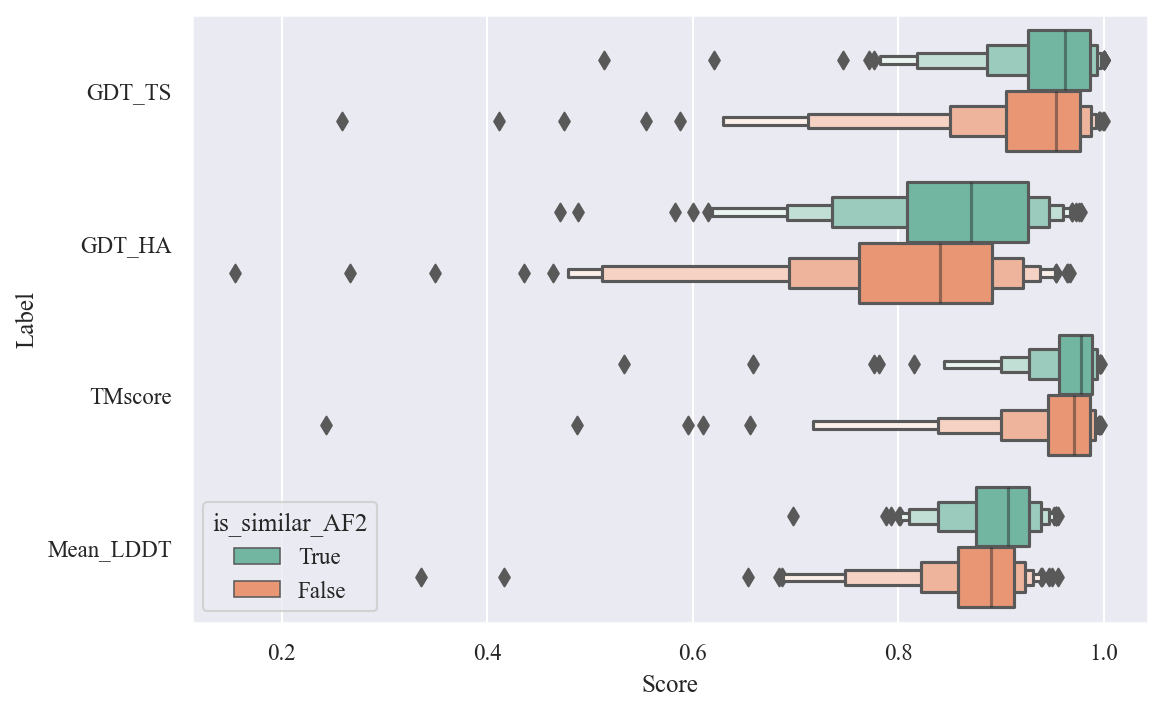

In [12]:
# max value for each label
# Targets whose similar sequence is included in AF2 training dataset or not
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
for label in labels:
    data=df.groupby('Target').max(label)
    data['Score'] = data[label]
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2', hue='is_similar_AF2', hue_order=[True, False])
plt.tight_layout()
# plt.savefig(fig_dir / 'max_value_each_labels_similar_training.png')

In [13]:
# Statistical test
similar_df = label_max_df[label_max_df['is_similar_AF2'] == True]
not_similar_df = label_max_df[label_max_df['is_similar_AF2'] == False]
for label in labels:
    print(label)
    x = similar_df.query('Label == @label')['Score']
    y = not_similar_df.query('Label == @label')['Score']
    print(f'{x.mean():.3f}, {y.mean():.3f}')
    result = stats.mannwhitneyu(x, y)
    print(result)

GDT_TS
0.942, 0.915
MannwhitneyuResult(statistic=9394.0, pvalue=0.0067573213531823)
GDT_HA
0.852, 0.807
MannwhitneyuResult(statistic=8806.5, pvalue=0.0005731294481753093)
TMscore
0.960, 0.942
MannwhitneyuResult(statistic=9555.0, pvalue=0.01204804385114575)
Mean_LDDT
0.894, 0.869
MannwhitneyuResult(statistic=9957.0, pvalue=0.042673678120378665)


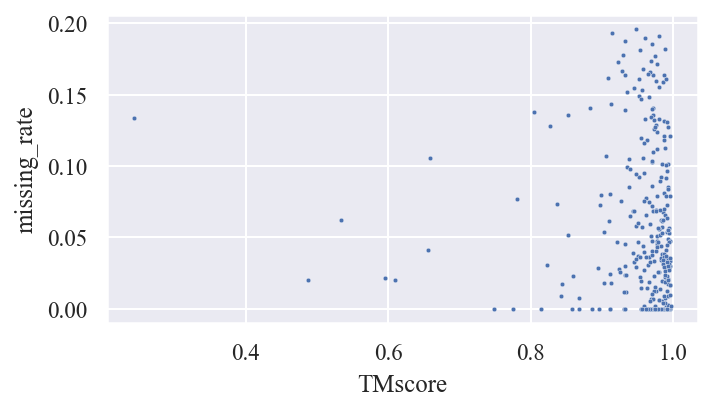

In [14]:
# Relationship between TMscore and ratio of missing residues
max_tmscore_df = df.groupby('Target').max('TMscore')
max_tmscore_df['missing_rate'] = max_tmscore_df['Num_missing'] / max_tmscore_df['Length']
sns.scatterplot(data=max_tmscore_df, x='TMscore', y='missing_rate', s=5)
plt.tight_layout()

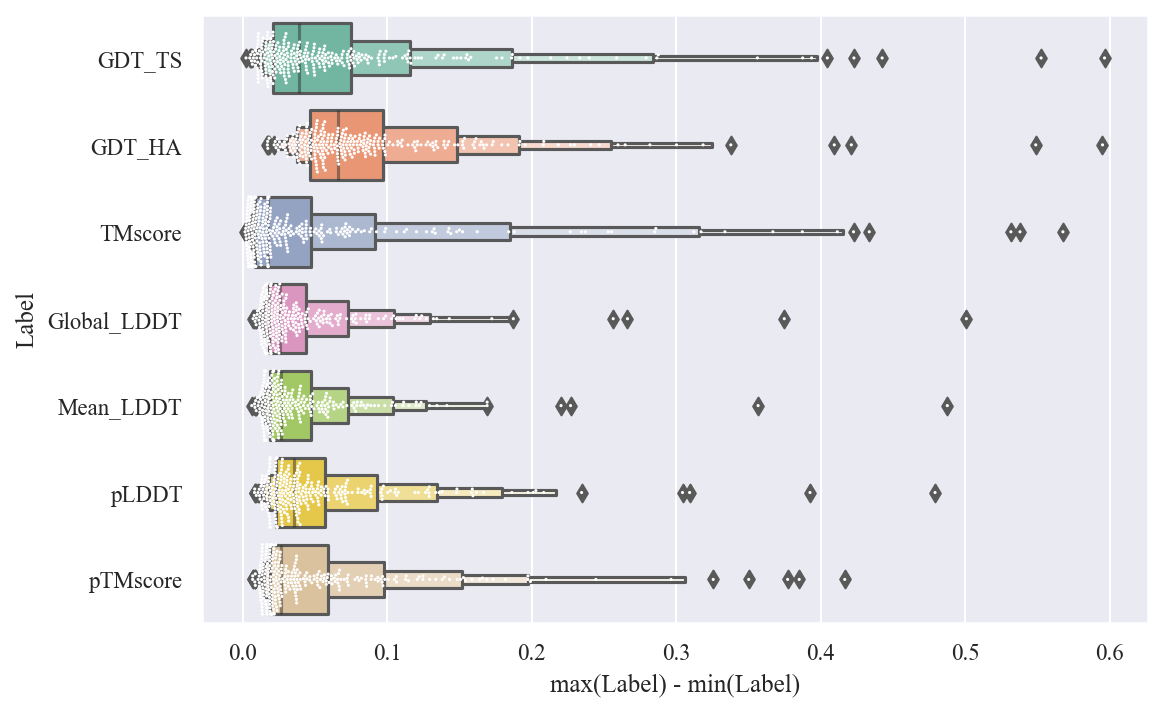

In [15]:
# max value - min value for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Global_LDDT', 'Mean_LDDT', 'pLDDT', 'pTMscore']
for label in labels:
    value=df.groupby('Target').max(label)[label] - df.groupby('Target').min(label)[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
plt.xlabel(f'max(Label) - min(Label)')
plt.tight_layout()
plt.savefig(fig_dir / 'max_minus_min_each_labels.png')

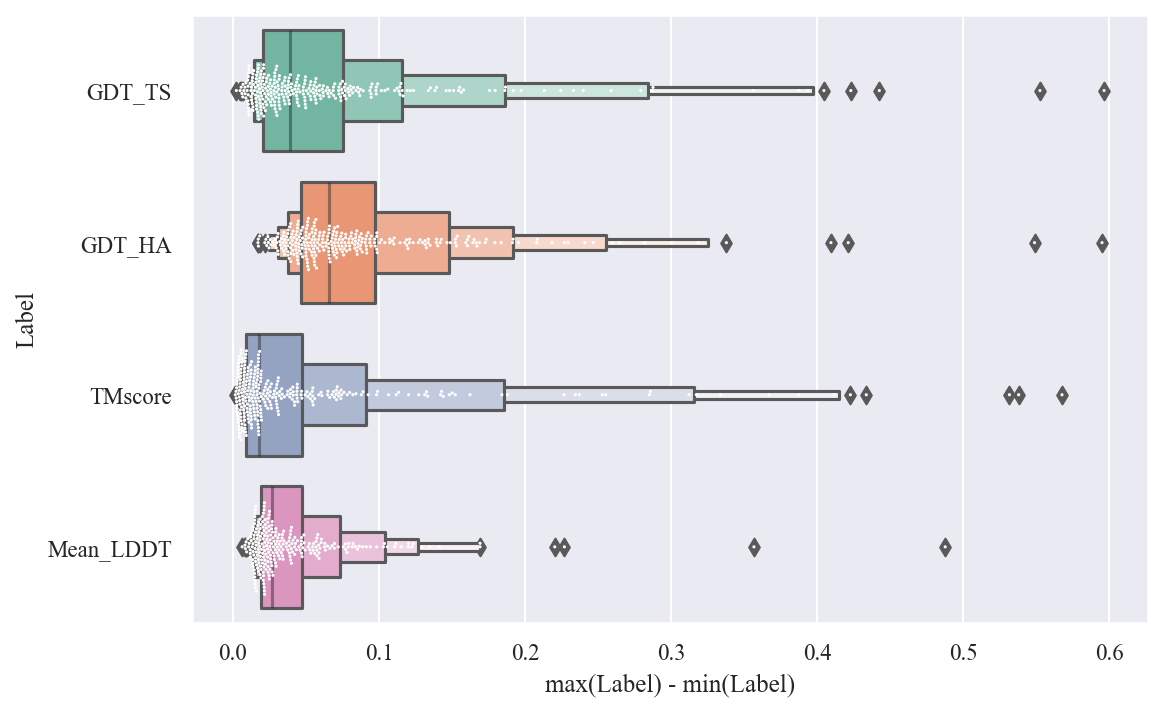

In [16]:
# max value - min value for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
for label in labels:
    value=df.groupby('Target').max(label)[label] - df.groupby('Target').min(label)[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
plt.xlabel(f'max(Label) - min(Label)')
plt.tight_layout()
# plt.savefig(fig_dir / 'max_minus_min_each_labels.png')

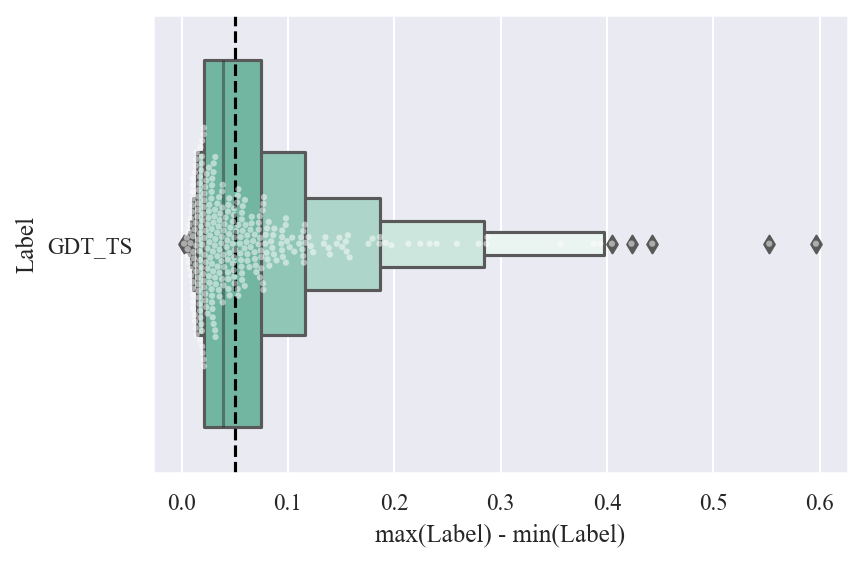

In [17]:
# max value - min value for each label
label_max_datas = []
labels = ['GDT_TS']
# labels = ['GDT_TS', 'GDT_HA', 'TMscore']
for label in labels:
    value=df.groupby('Target').max(label)[label] - df.groupby('Target').min(label)[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(6, 4))
# plt.axvline(x=0.05, color='black', linestyle='--')
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=3, alpha=0.5)
plt.axvline(x=0.05, color='black', linestyle='--')
plt.xlabel(f'max(Label) - min(Label)')
plt.tight_layout()
# plt.savefig(fig_dir / 'max_minus_min_each_labels.png')

In [18]:
# Count target number whose value difference between max and min is larger than threshold
label = 'GDT_TS'
fil_df = df.groupby('Target').filter(lambda x: x[label].max() - x[label].min() >= 0.05)
print(fil_df['Target'].unique().size)
print(fil_df.groupby('Target').head(1)['is_similar_AF2'].value_counts())

121
False    70
True     51
Name: is_similar_AF2, dtype: int64


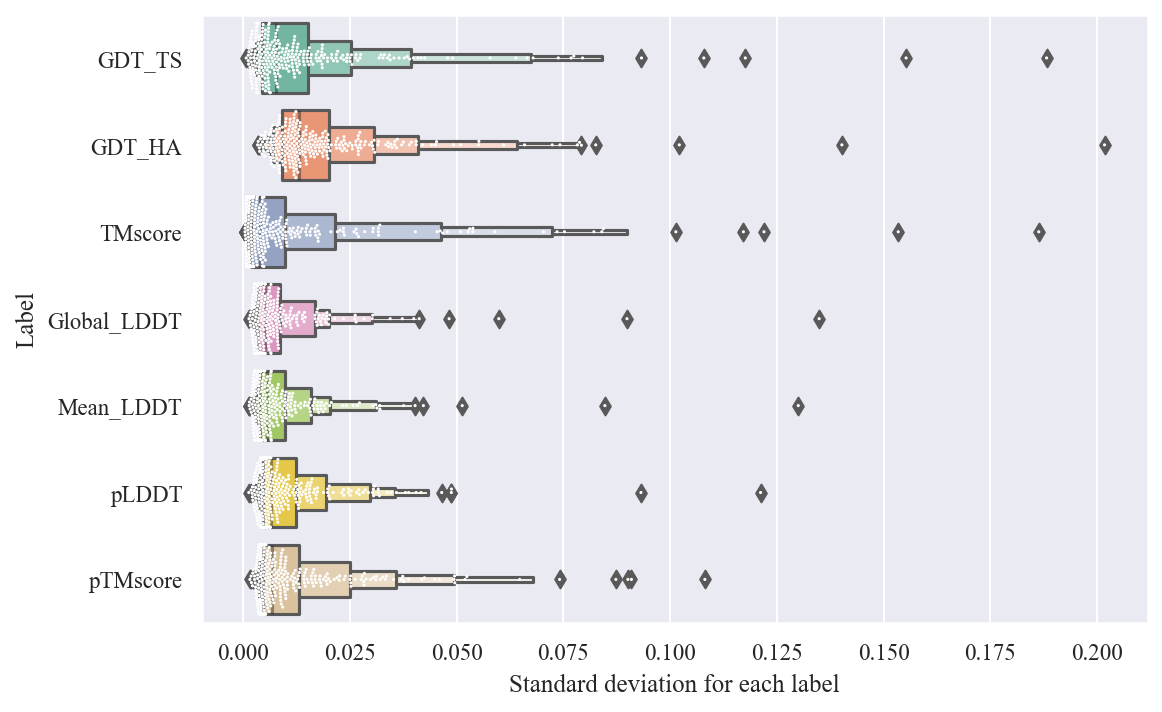

In [19]:
# Standard deviation for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Global_LDDT', 'Mean_LDDT', 'pLDDT', 'pTMscore']
for label in labels:
    value=df.groupby('Target').std()[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
plt.xlabel('Standard deviation for each label')
plt.tight_layout()
plt.savefig(fig_dir / 'std_each_labels.png')

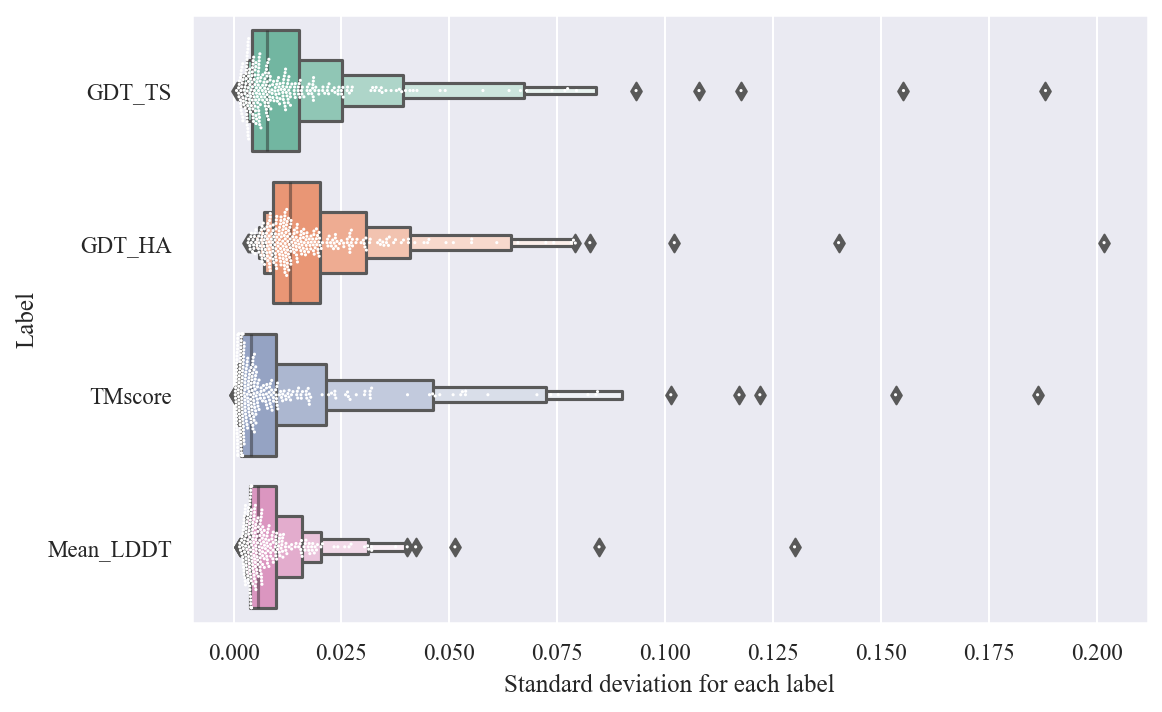

In [20]:
# Standard deviation for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
for label in labels:
    value=df.groupby('Target').std()[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
plt.xlabel('Standard deviation for each label')
plt.tight_layout()
# plt.savefig(fig_dir / 'std_each_labels.png')

## Verify pLDDT and pTM

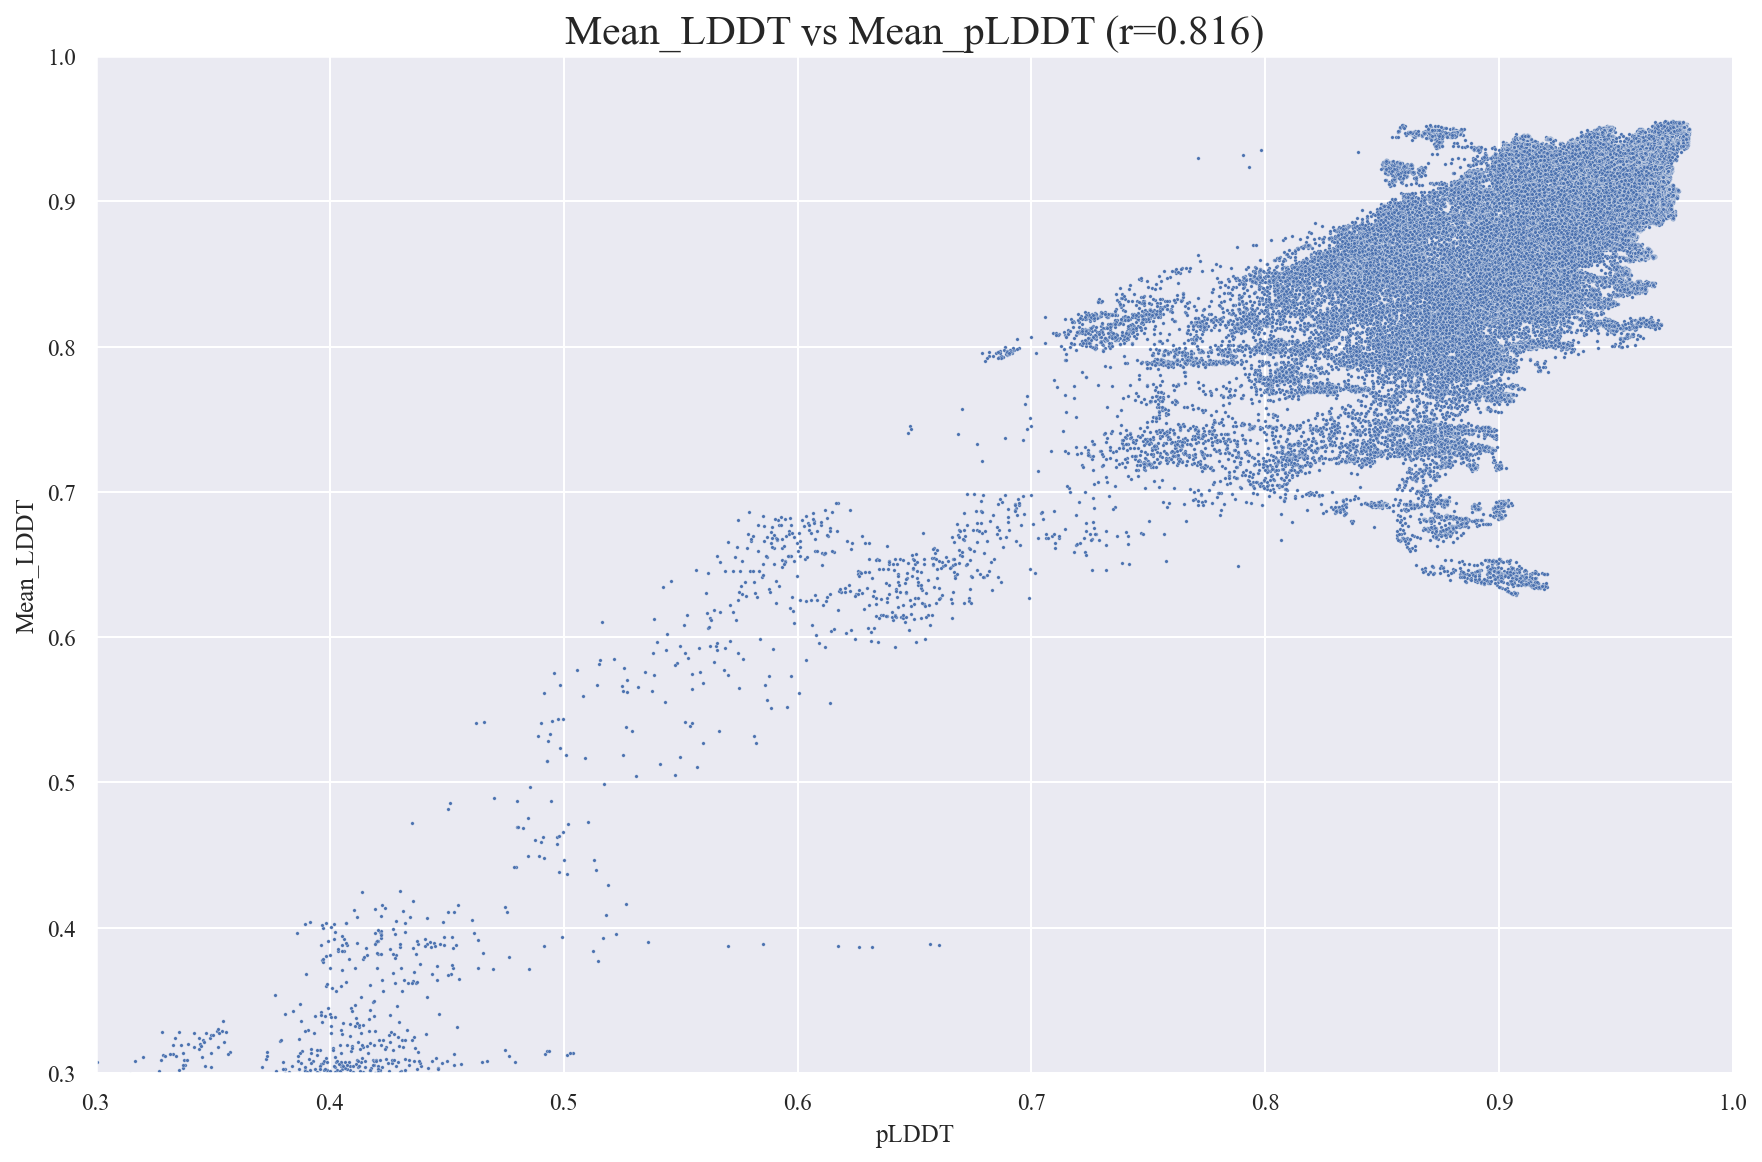

In [21]:
# Mean pLDDT vs Mean LDDT
label = 'Mean_LDDT'
score = 'pLDDT'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.xlim(0.3, 1.0)
plt.ylim(0.3, 1.0)
plt.title(f'{label} vs Mean_{score} (r={cc:.3f})', fontsize=20)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')


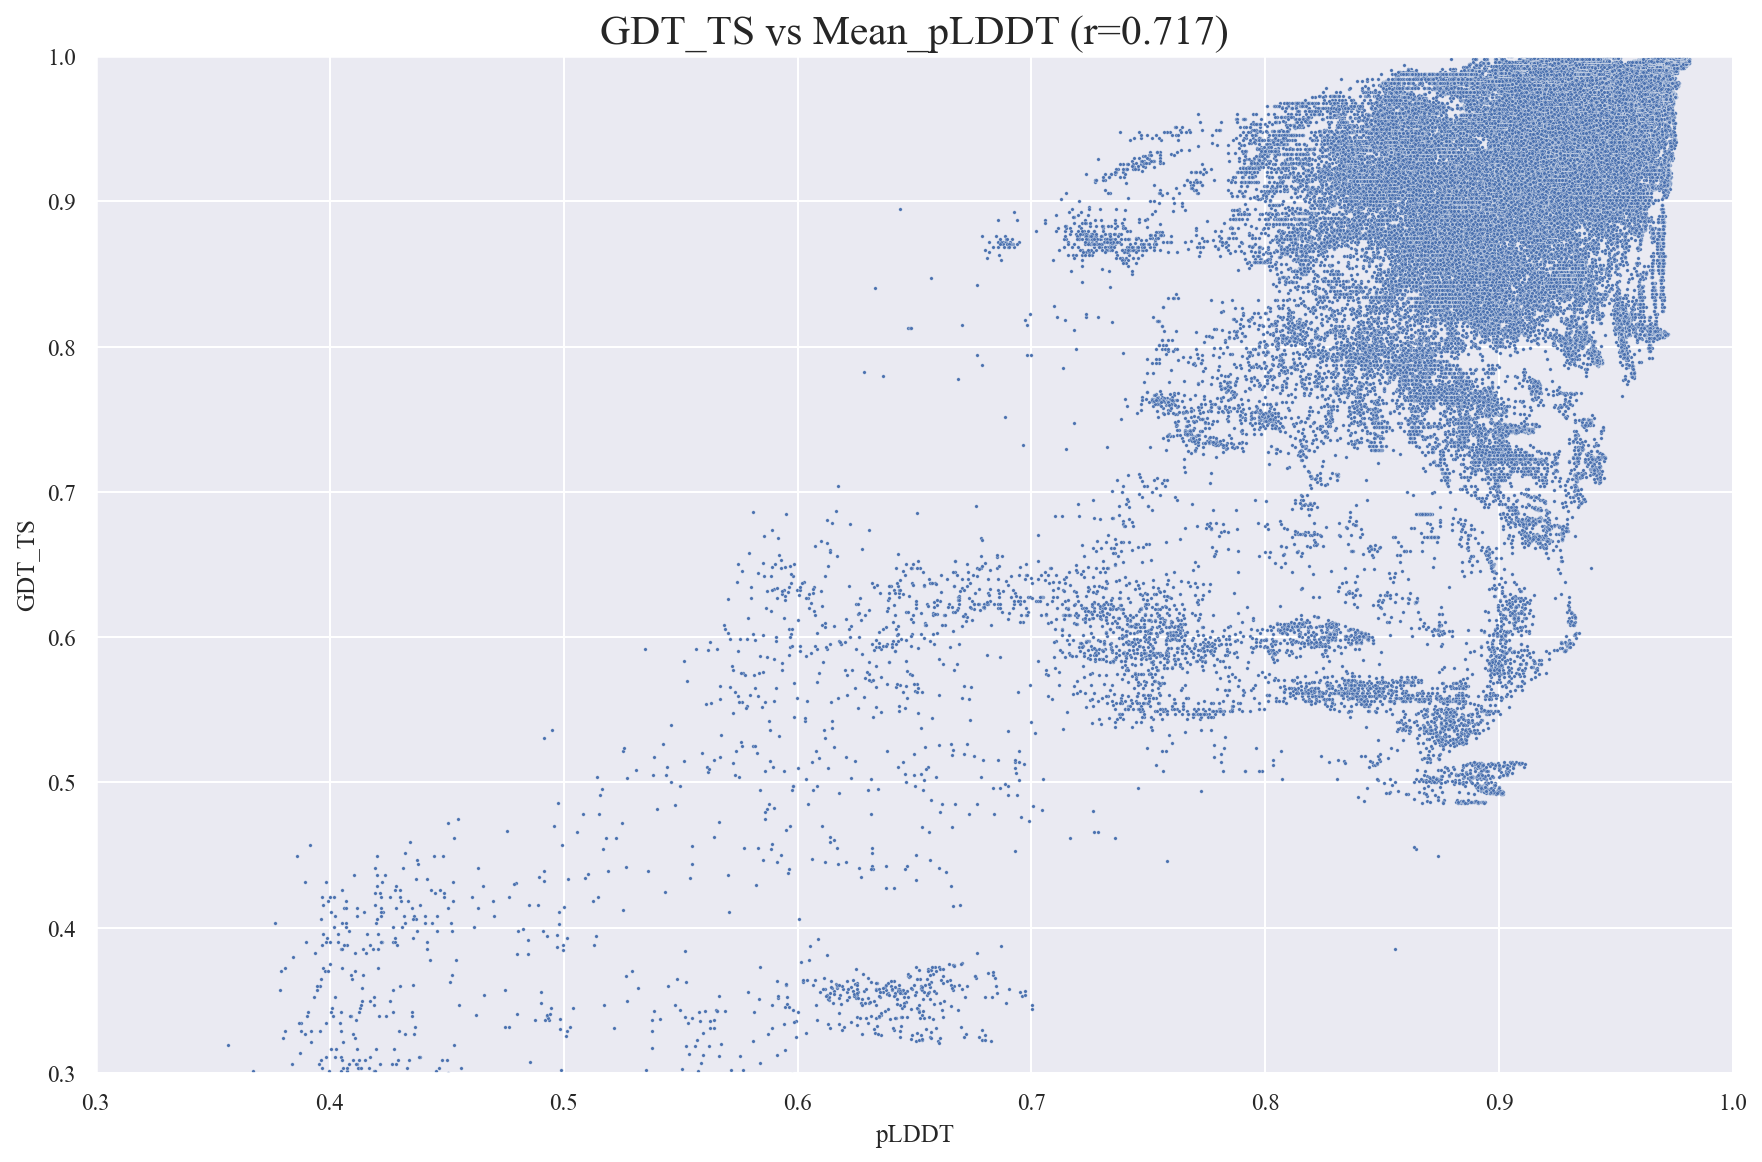

In [22]:
# Mean pLDDT vs GDT_TS
label = 'GDT_TS'
score = 'pLDDT'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.xlim(0.3, 1.0)
plt.ylim(0.3, 1.0)
plt.title(f'{label} vs Mean_{score} (r={cc:.3f})', fontsize=20)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')


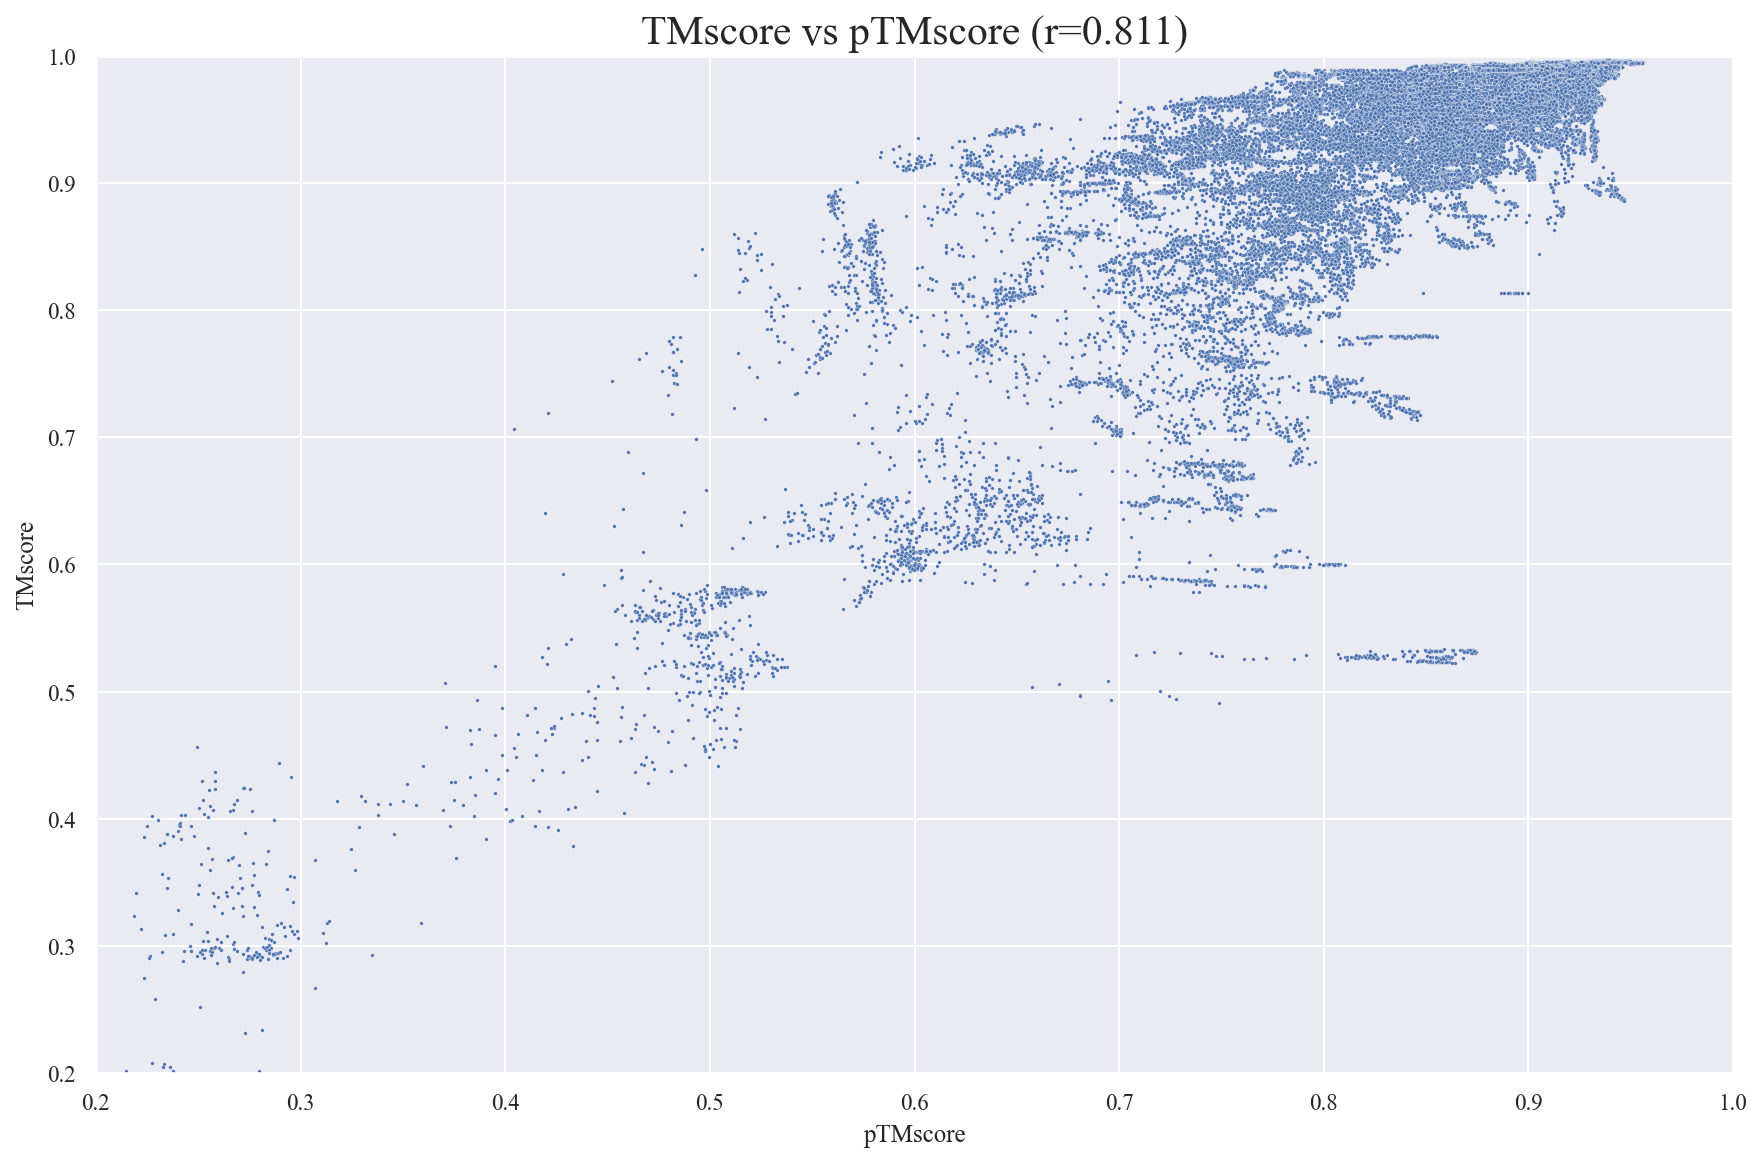

In [23]:
# pTMscore vs TMscore
label = 'TMscore'
score = 'pTMscore'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.xlim(0.2, 1.0)
plt.ylim(0.2, 1.0)
plt.title(f'{label} vs {score} (r={cc:.3f})', fontsize=20)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')

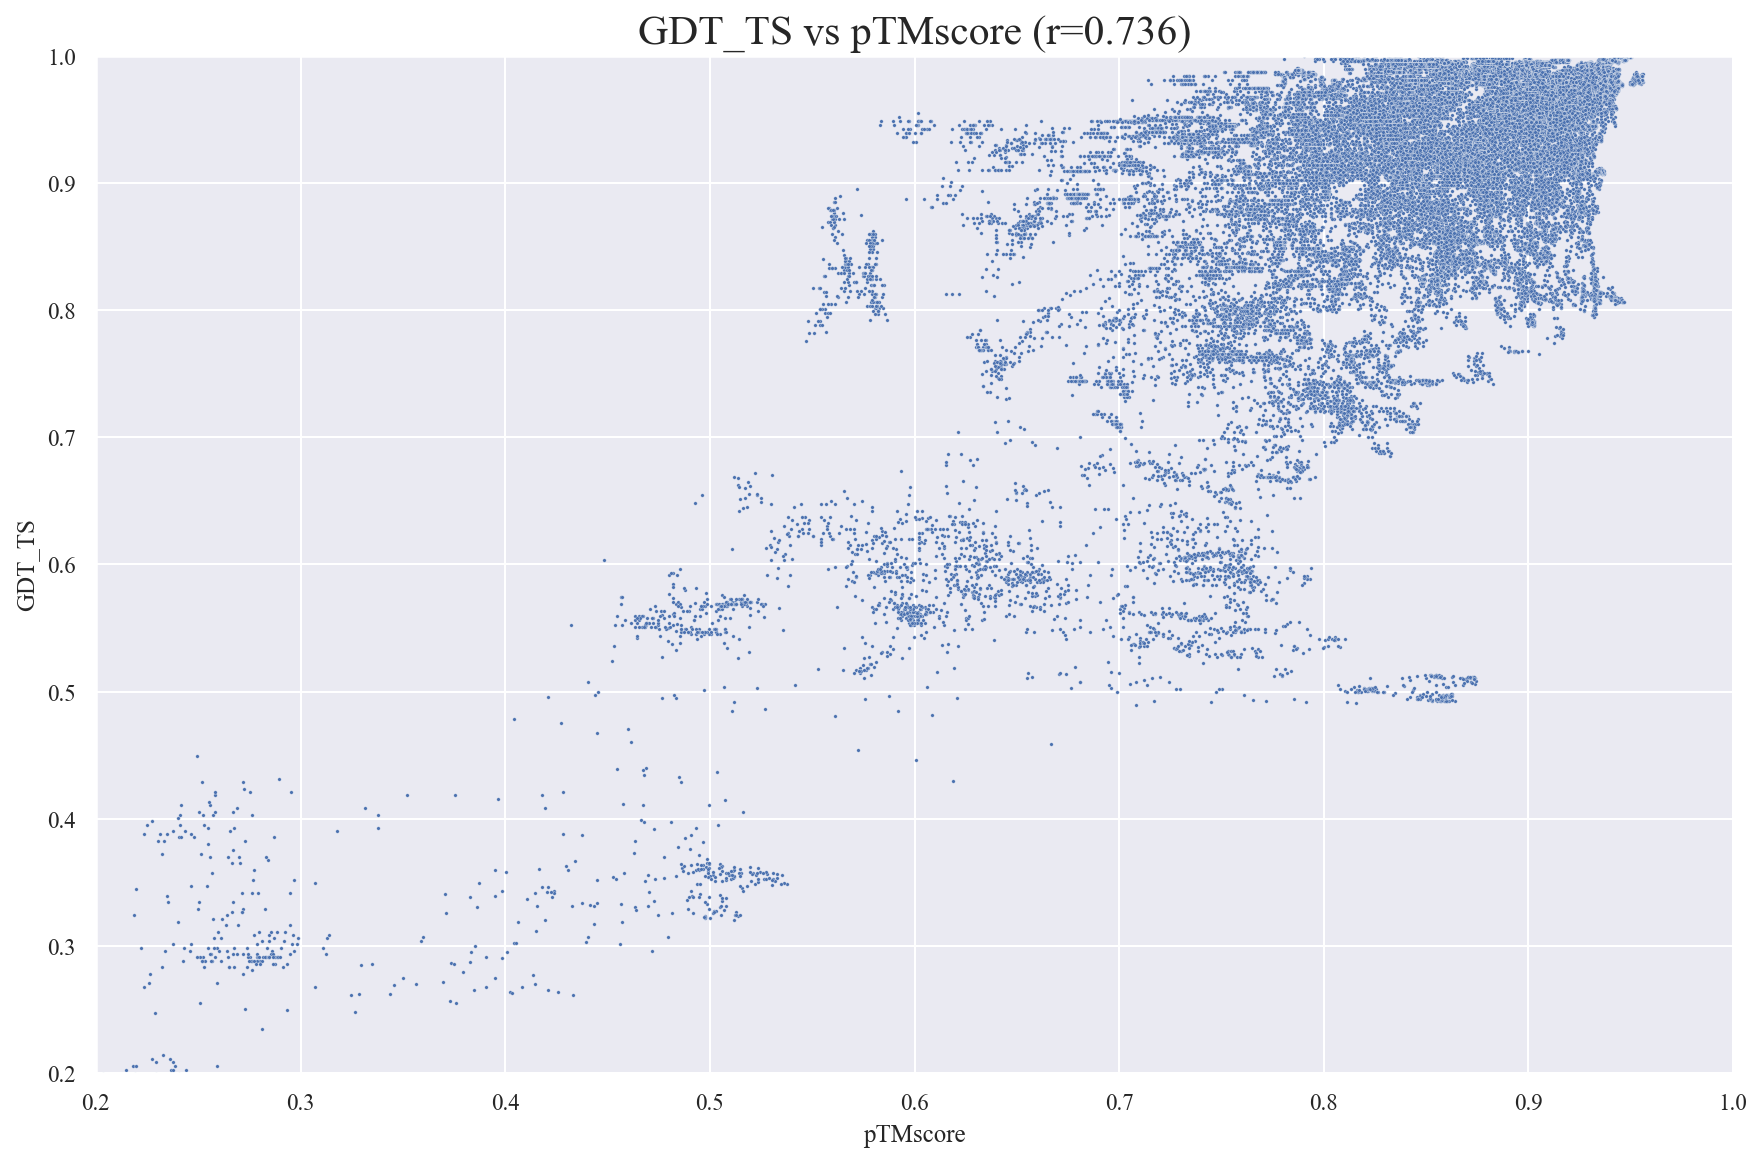

In [24]:
# pTMscore vs GDT_TS
label = 'GDT_TS'
score = 'pTMscore'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.xlim(0.2, 1.0)
plt.ylim(0.2, 1.0)
plt.title(f'{label} vs {score} (r={cc:.3f})', fontsize=20)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')

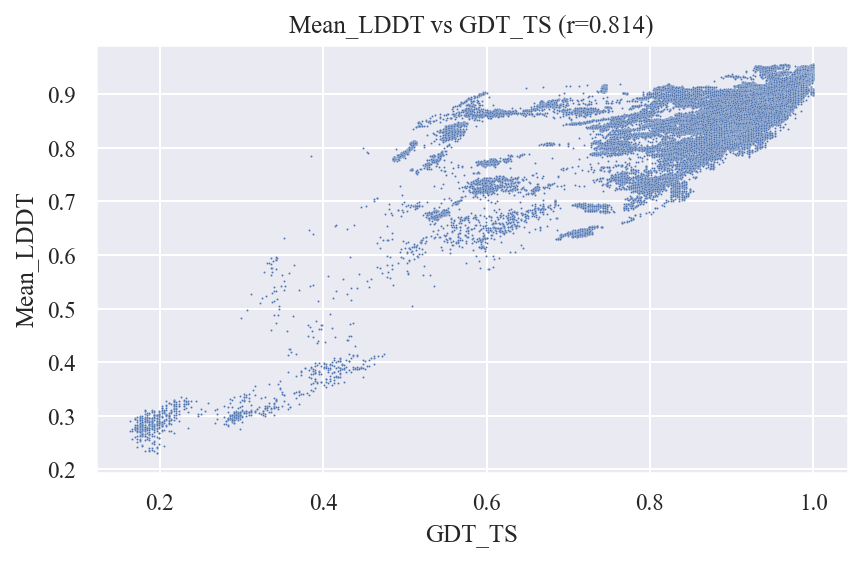

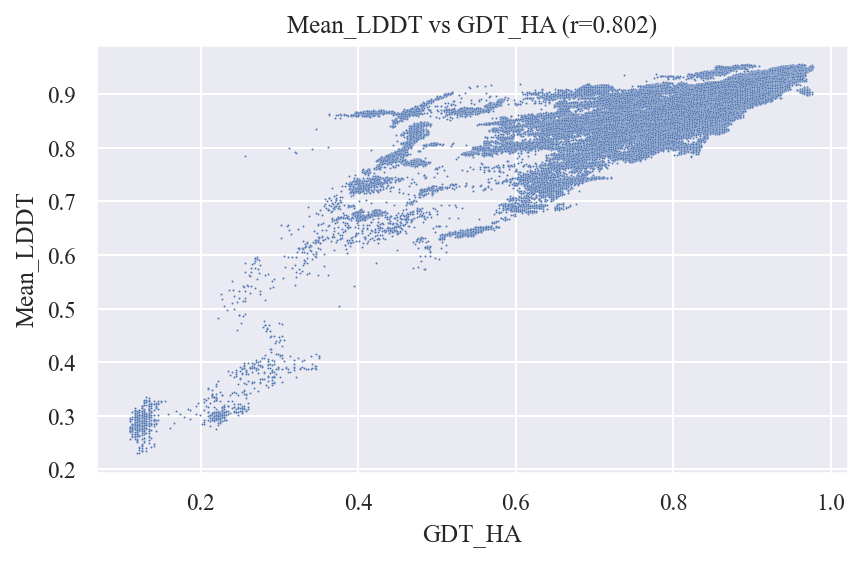

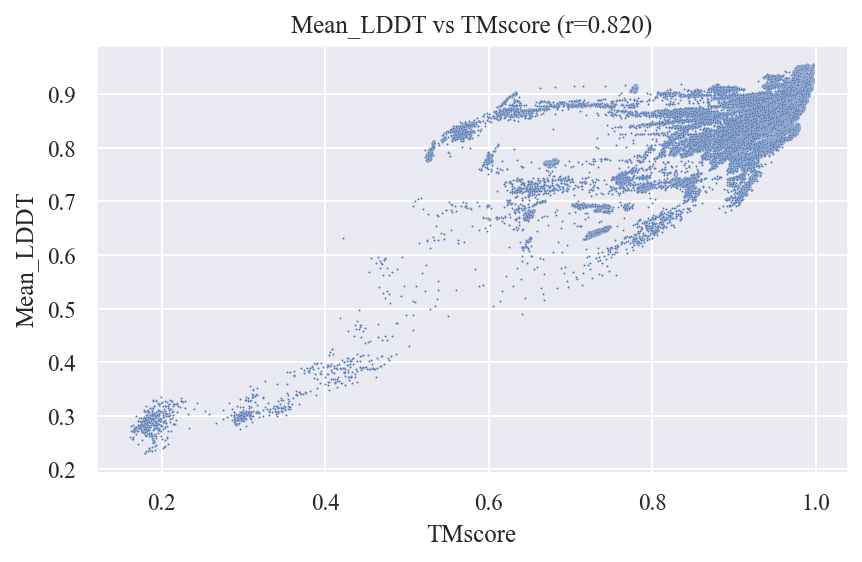

In [25]:
# Global score vs Mean local score
label = 'Mean_LDDT'
for label2 in ['GDT_TS', 'GDT_HA', 'TMscore']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=label2, y=label, s=1)
    cc = df.corr()[label][label2]
    plt.title(f'{label} vs {label2} (r={cc:.3f})')
    plt.tight_layout()
    plt.show()

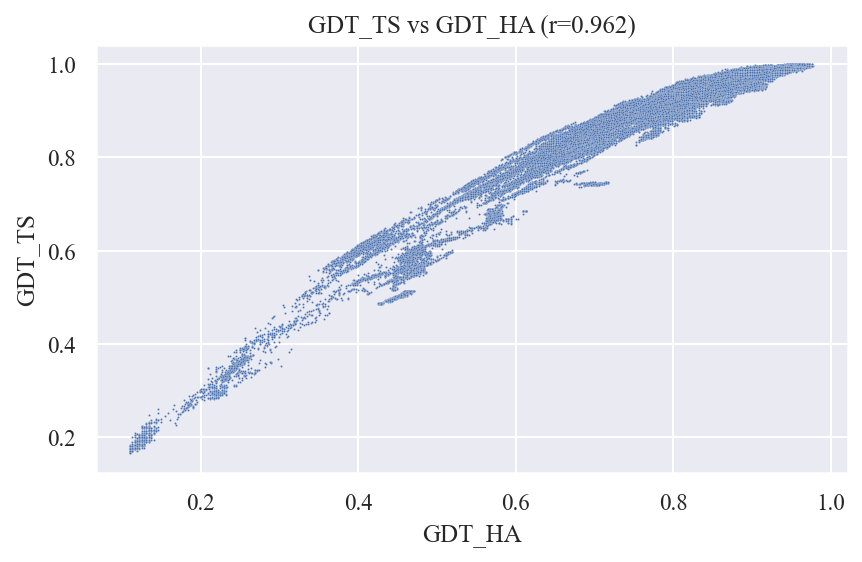

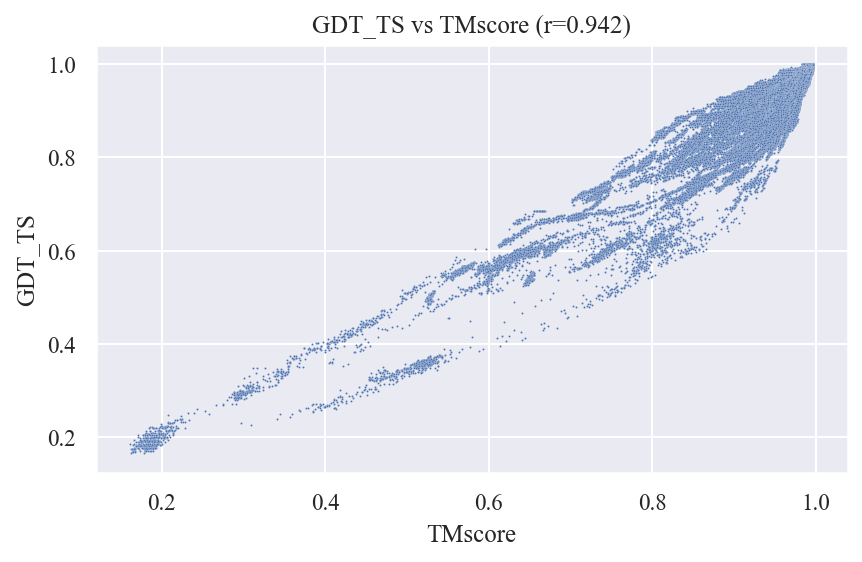

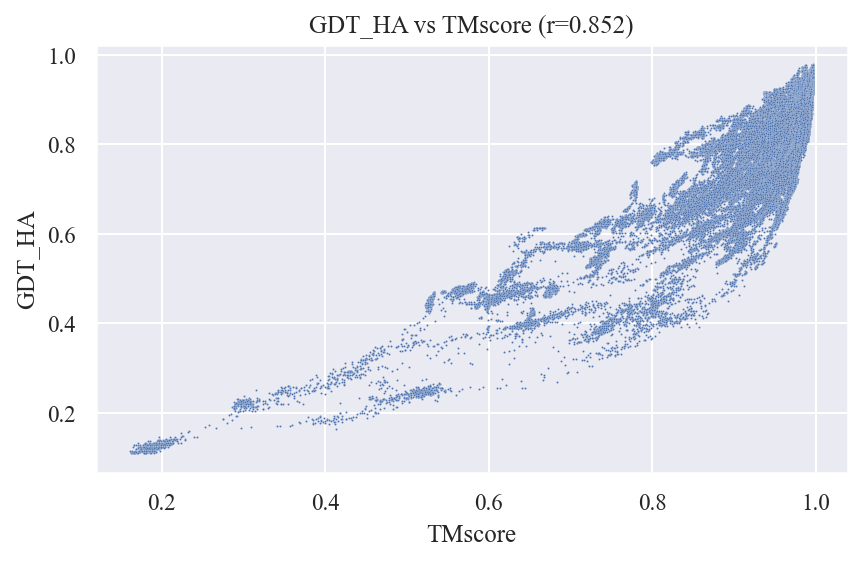

In [26]:
# Correlation between global labels
global_labels = ['GDT_TS', 'GDT_HA', 'TMscore']
for i, label1 in enumerate(global_labels):
    for label2 in global_labels[i + 1:]:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df, x=label2, y=label1, s=1)
        cc = df.corr()[label1][label2]
        plt.title(f'{label1} vs {label2} (r={cc:.3f})')
        plt.tight_layout()
    plt.show()

## Relationship between accuracy and (Neff and cluster size)

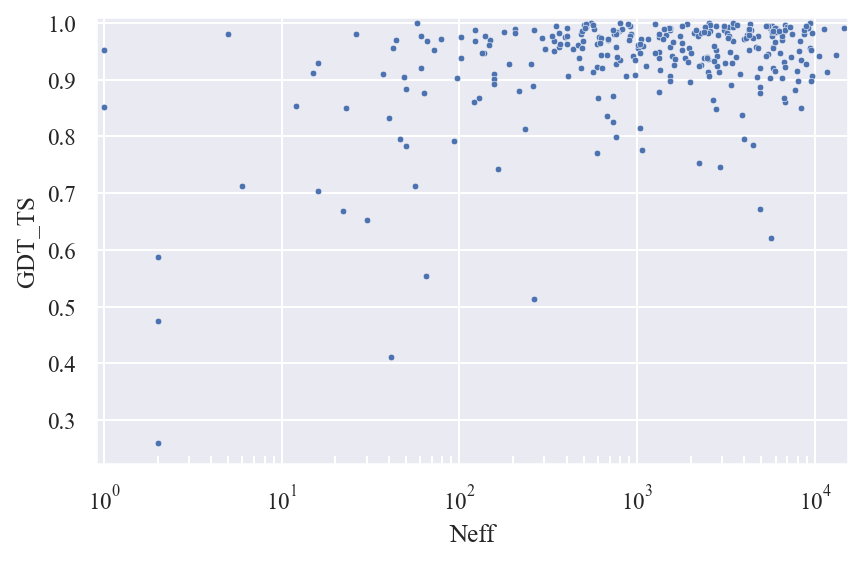

In [27]:
plt.figure(figsize=(6, 4))
label = 'GDT_TS'
data = df.groupby('Target').max(label)
g = sns.scatterplot(data=data, y=label, x='Neff', s=10)
plt.xlim(0.9, None)
plt.ylim(None, 1.01)
plt.xscale('log')
plt.tick_params(axis='x', which='minor', direction='in', color='white', bottom=True)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_neff_{label}.png')
plt.show()

905


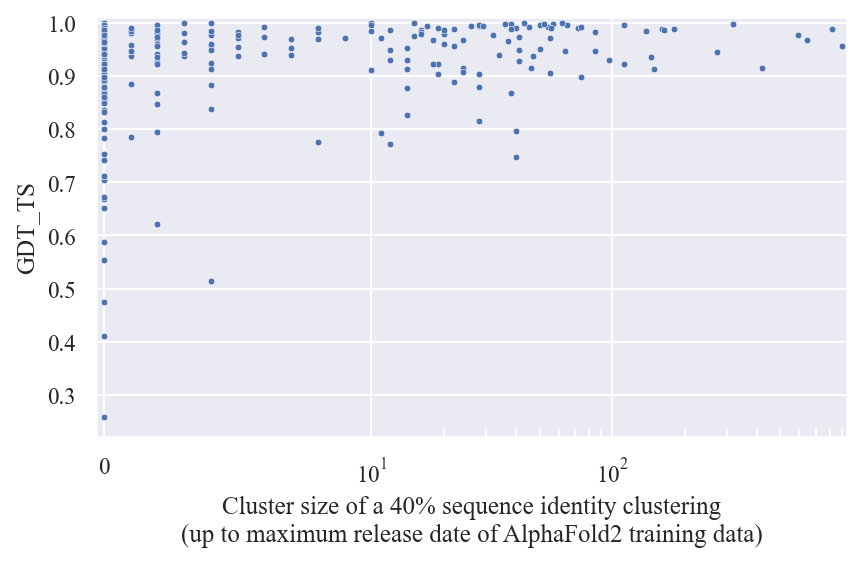

In [28]:
from matplotlib.ticker import SymmetricalLogLocator, FixedLocator
plt.figure(figsize=(6, 4))
label = 'GDT_TS'
df['num_entry_before_cluster'] = df['num_entry_in_cluster'] - df['num_entry_in_cluster_AF2_notInclude']
x = 'num_entry_before_cluster'
print(df['num_entry_before_cluster'].max())
data = df.groupby('Target').max(label)
g = sns.scatterplot(data=data, y=label, x=x, s=10)
plt.xlim(-0.3, None)
plt.ylim(None, 1.01)
plt.xscale('symlog', linthresh=10, base=10)
g.xaxis.set_minor_locator(SymmetricalLogLocator(base=10, subs=range(1, 10), linthresh=10))
# g.xaxis.set_minor_locator(FixedLocator(range(0, 10)))
g.tick_params(axis='x', which='minor', direction='in', color='white', bottom=True)
plt.xlabel('Cluster size of a 40% sequence identity clustering\n(up to maximum release date of AlphaFold2 training data)')
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_cluster_size_upto_max_release_date_{label}.png')
plt.show()

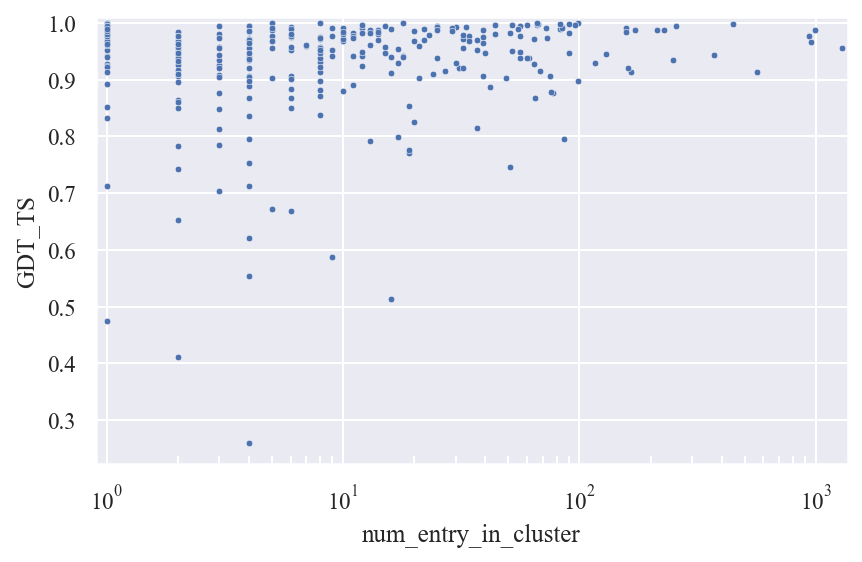

In [29]:
plt.figure(figsize=(6, 4))
label = 'GDT_TS'
x = 'num_entry_in_cluster'
data = df.groupby('Target').max(label)
g = sns.scatterplot(data=data, y=label, x=x, s=10)
plt.xlim(0.9, None)
plt.ylim(None, 1.01)
plt.xscale('log')
plt.tick_params(axis='x', which='minor', direction='in', color='white', bottom=True)
plt.tight_layout()
# plt.savefig(fig_dir / f'scatter_cluster_size_{label}.png')
plt.show()

## Relationship between pLDDT and (Neff and cluster size)

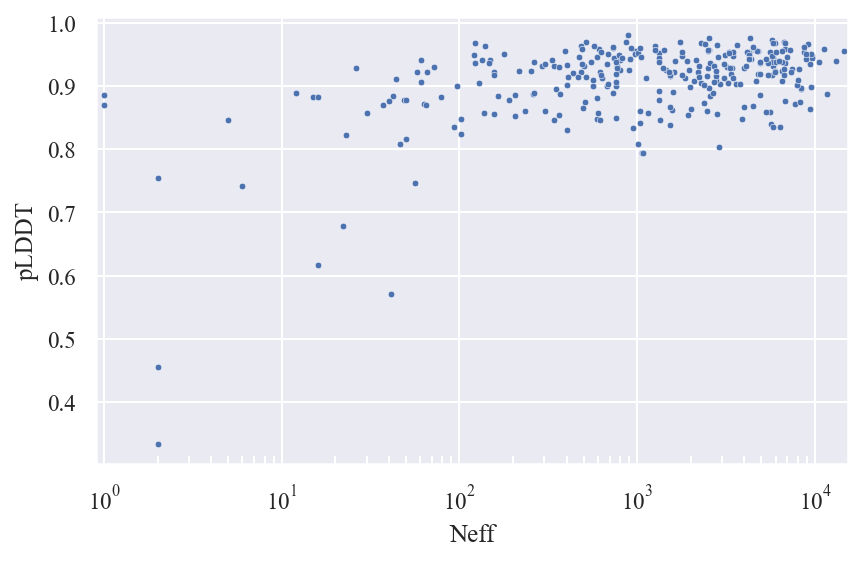

In [30]:
plt.figure(figsize=(6, 4))
label = 'GDT_TS'
data = df.groupby('Target').apply(lambda x: x.loc[x[label].idxmax()])
y = 'pLDDT'
g = sns.scatterplot(data=data, y=y, x='Neff', s=10)
plt.xlim(0.9, None)
plt.ylim(None, 1.01)
plt.xscale('log')
plt.tick_params(axis='x', which='minor', direction='in', color='white', bottom=True)
plt.tight_layout()
plt.show()

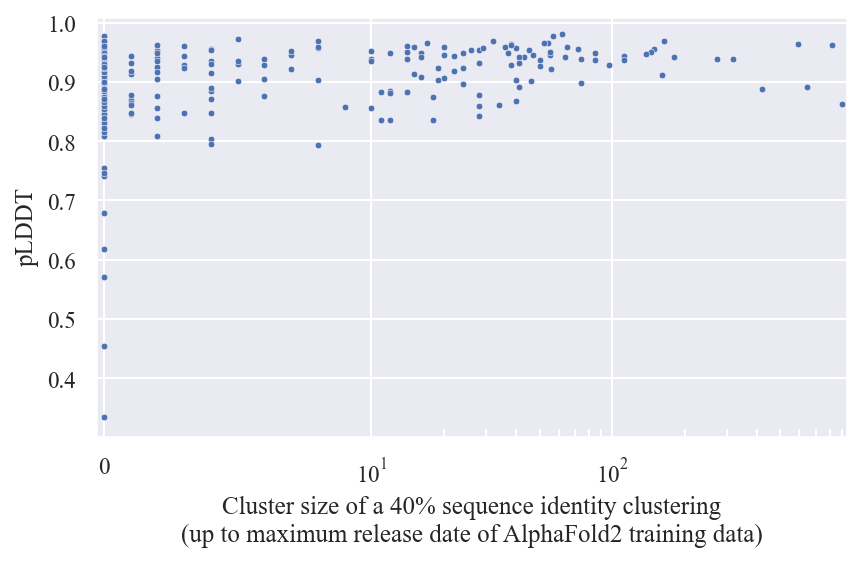

In [31]:
plt.figure(figsize=(6, 4))
label = 'GDT_TS'
x = 'num_entry_before_cluster'
data = df.groupby('Target').apply(lambda x: x.loc[x[label].idxmax()])
y = 'pLDDT'
g = sns.scatterplot(data=data, y=y, x=x, s=10)
plt.xlim(-0.3, None)
plt.ylim(None, 1.01)
plt.xscale('symlog', linthresh=10, base=10)
g.xaxis.set_minor_locator(SymmetricalLogLocator(base=10, subs=range(1, 10), linthresh=10))
# g.xaxis.set_minor_locator(FixedLocator(range(0, 10)))
g.tick_params(axis='x', which='minor', direction='in', color='white', bottom=True)
plt.xlabel('Cluster size of a 40% sequence identity clustering\n(up to maximum release date of AlphaFold2 training data)')
plt.tight_layout()
plt.show()